In [4]:
from math import sqrt
from skimage import data, io
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import os
import random
import matplotlib.pyplot as plt

In [2]:
dataset_path = '../../data/vehicle-type-detection/'

def select_random_image():
    categories = ['hatchback', 'motorcycle', 'pickup', 'sedan', 'suv']
    
    selected_category = random.choice(categories)
    
    category_path = os.path.join(dataset_path, selected_category)
    
    image_files = os.listdir(category_path)
    
    selected_image = random.choice(image_files)
    
    image_path = os.path.join(category_path, selected_image)
    
    return image_path

Method: Laplacian of Gaussian
Number of blobs detected: 109
Index X        Y        Radius  


NameError: name 'i' is not defined

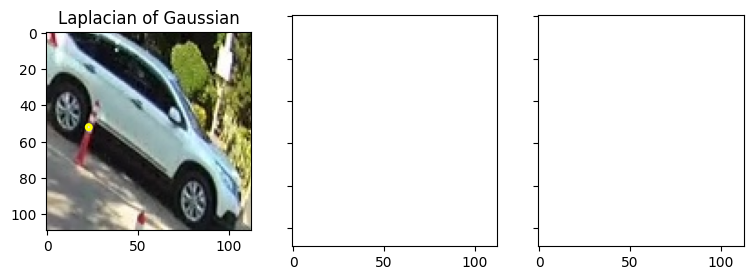

In [7]:
image = io.imread(select_random_image())
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=0.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=0.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    print(f"Method: {title}")
    print(f"Number of blobs detected: {len(blobs)}")
    print(f"{'Index':<5} {'X':<8} {'Y':<8} {'Radius':<8}")

    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for i, blob in enumerate(blobs):
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)

        print(f"{i:<5} {x:<8.2f} {y:<8.2f} {r:<8.2f}")
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()